In [5]:
#x是特征，y是标签
from sklearn import datasets
import numpy as np

# 创建新的半月形数据集，样本量减少，噪声增加
x, y = datasets.make_moons(n_samples=10000, noise=0.4, random_state=123)
# 将列表转换为numpy数组以支持shape属性
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
print(np.unique(y))

(10000, 2)
(10000,)
[0 1]


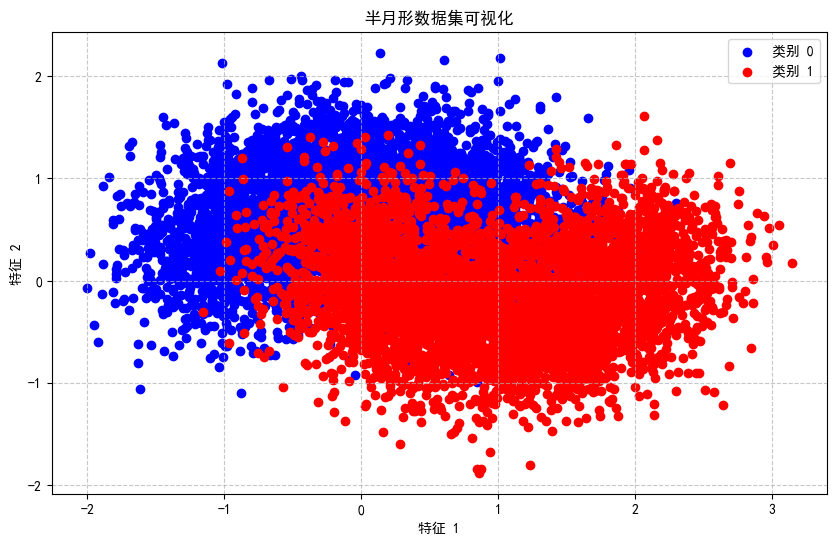

In [6]:
# 解决matplotlib中文显示问题
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib as mpl

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号'-'显示为方块的问题

# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue', label='类别 0')
plt.scatter(x[y==1, 0], x[y==1, 1], color='red', label='类别 1')
plt.title('半月形数据集可视化')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 集成学习

训练集大小: (7000, 2)
测试集大小: (3000, 2)

逻辑回归 模型评估:
准确率: 0.8380
训练时间: 0.00 秒

分类报告:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1532
           1       0.83      0.85      0.84      1468

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000


SVC 模型评估:
准确率: 0.8510
训练时间: 1.62 秒

分类报告:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1532
           1       0.84      0.86      0.85      1468

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000


决策树 模型评估:
准确率: 0.8417
训练时间: 0.01 秒

分类报告:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1532
           1       0.86      0.81      0.83      1468

    accuracy      

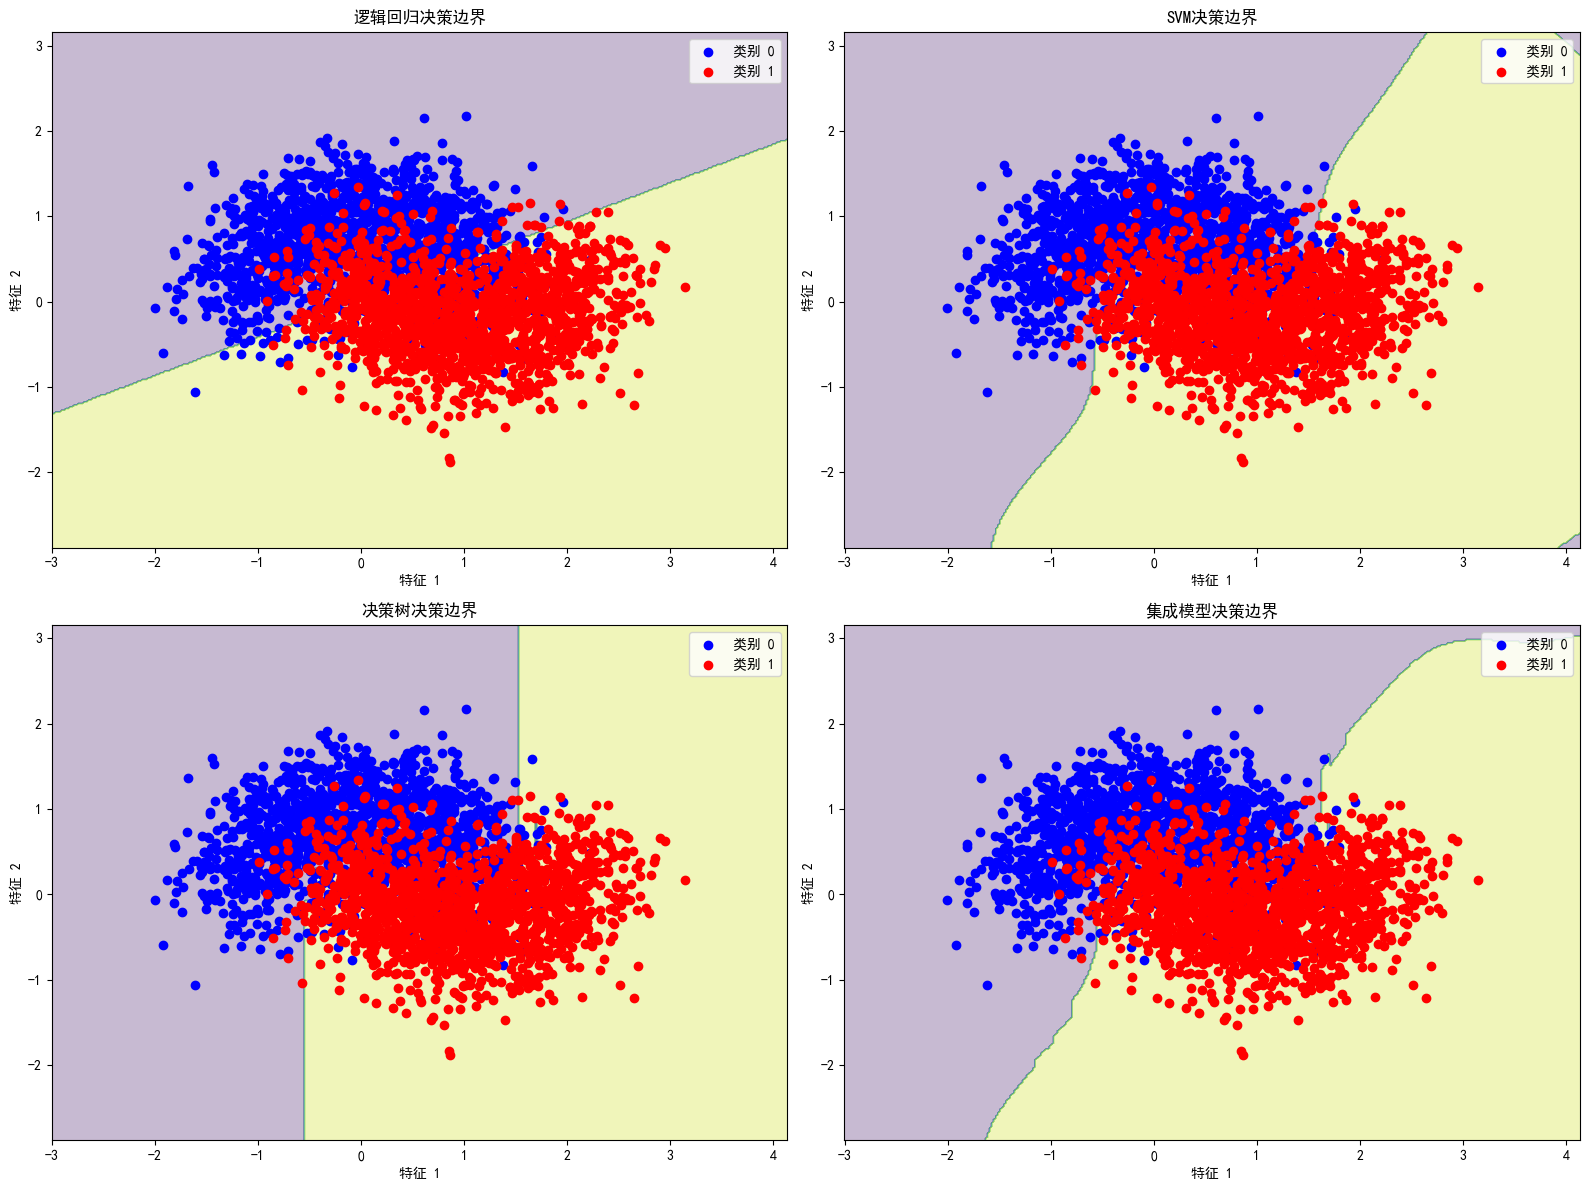


集成学习的优势总结:
1. 提高模型稳定性：通过结合多个模型，减少了单一模型的方差
2. 减少过拟合：集成模型通常比单个复杂模型更不容易过拟合
3. 提高预测准确率：多个模型投票通常可以纠正单个模型的错误
4. 降低犯错的风险：即使某些基模型在特定数据上表现不佳，集成模型仍可能表现良好


In [7]:
# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)

# 2. 创建三个基分类器
# 逻辑回归分类器
lr = LogisticRegression(max_iter=1000, random_state=42)
# 支持向量机分类器
svc = SVC(kernel='rbf', probability=True, random_state=42)
# 决策树分类器
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# 3. 创建集成模型（软投票）
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr),  # 逻辑回归
        ('svc', svc),  # 支持向量机
        ('dt', dt)  # 决策树
    ],
    voting='soft'  # 软投票，基于预测的概率进行投票
)

# 4. 对每个模型进行训练并评估
models = {
    '逻辑回归': lr,
    'SVC': svc,
    '决策树': dt,
    '集成模型': ensemble_model
}

results = {}

for name, model in models.items():
    # 记录开始时间
    start_time = time.time()
    
    # 训练模型
    model.fit(X_train, y_train)
    
    # 记录结束时间
    train_time = time.time() - start_time
    
    # 在测试集上预测
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    # 存储结果
    results[name] = {
        '准确率': accuracy,
        '训练时间': train_time
    }
    
    # 打印结果
    print(f"\n{name} 模型评估:")
    print(f"准确率: {accuracy:.4f}")
    print(f"训练时间: {train_time:.2f} 秒")
    print("\n分类报告:")
    print(classification_report(y_test, y_pred))


# 5. 可视化决策边界
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='类别 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='类别 1')
    plt.title(title)
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    plt.legend()

plt.figure(figsize=(16, 12))

# 绘制四个模型的决策边界
plt.subplot(2, 2, 1)
plot_decision_boundary(lr, X_test, y_test, "逻辑回归决策边界")

plt.subplot(2, 2, 2)
plot_decision_boundary(svc, X_test, y_test, "SVM决策边界")

plt.subplot(2, 2, 3)
plot_decision_boundary(dt, X_test, y_test, "决策树决策边界")

plt.subplot(2, 2, 4)
plot_decision_boundary(ensemble_model, X_test, y_test, "集成模型决策边界")

plt.tight_layout()
plt.show()

# 7. 总结集成学习的优势
print("\n集成学习的优势总结:")
print("1. 提高模型稳定性：通过结合多个模型，减少了单一模型的方差")
print("2. 减少过拟合：集成模型通常比单个复杂模型更不容易过拟合")
print("3. 提高预测准确率：多个模型投票通常可以纠正单个模型的错误")
print("4. 降低犯错的风险：即使某些基模型在特定数据上表现不佳，集成模型仍可能表现良好")




硬投票集成学习结果:
准确率: 0.8477

分类报告:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1532
           1       0.84      0.86      0.85      1468

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



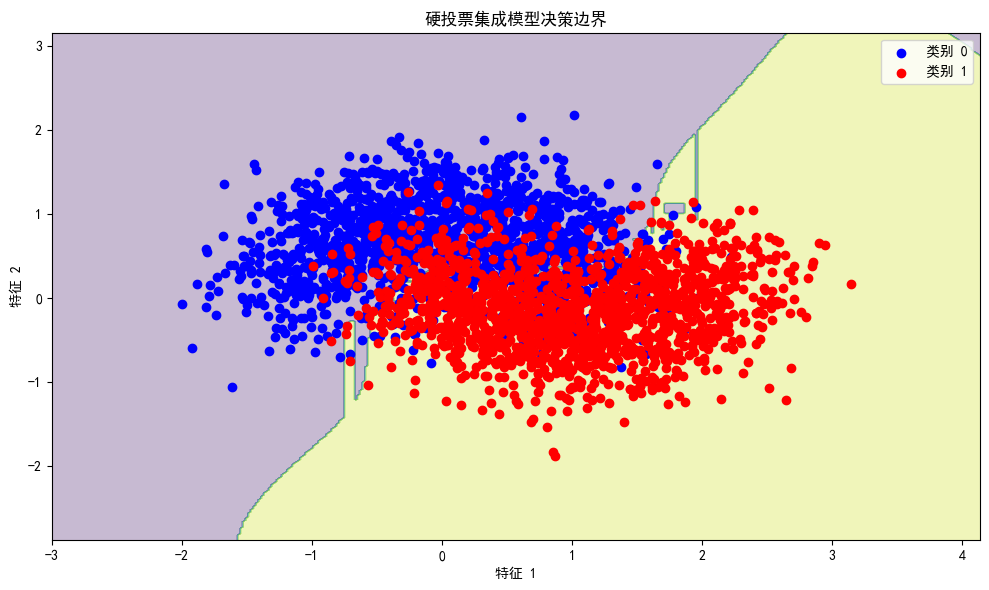


不同集成方法比较:
软投票集成准确率: 0.8503
硬投票集成准确率: 0.8477
基础模型平均准确率: 0.8436


In [8]:
# 创建硬投票分类器
hard_voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='hard'  # 使用硬投票
)

# 训练硬投票分类器
hard_voting.fit(X_train, y_train)

# 分别评估各个基础模型
lr_accuracy = lr.score(X_test, y_test)
svm_accuracy = svc.score(X_test, y_test)
dt_accuracy = dt.score(X_test, y_test)

# 评估硬投票分类器
hard_voting_accuracy = hard_voting.score(X_test, y_test)
hard_voting_predictions = hard_voting.predict(X_test)
hard_voting_report = classification_report(y_test, hard_voting_predictions)

print("\n硬投票集成学习结果:")
print(f"准确率: {hard_voting_accuracy:.4f}")
print("\n分类报告:")
print(hard_voting_report)

# 可视化硬投票模型的决策边界
plt.figure(figsize=(10, 6))
plot_decision_boundary(hard_voting, X_test, y_test, "硬投票集成模型决策边界")
plt.tight_layout()
plt.show()

# 比较不同集成方法
print("\n不同集成方法比较:")
print(f"软投票集成准确率: {accuracy:.4f}")
print(f"硬投票集成准确率: {hard_voting_accuracy:.4f}")
print(f"基础模型平均准确率: {np.mean([lr_accuracy, svm_accuracy, dt_accuracy]):.4f}")


# BaggingClassifier


Bagging集成学习结果:
准确率: 0.8240

分类报告:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1532
           1       0.83      0.81      0.82      1468

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



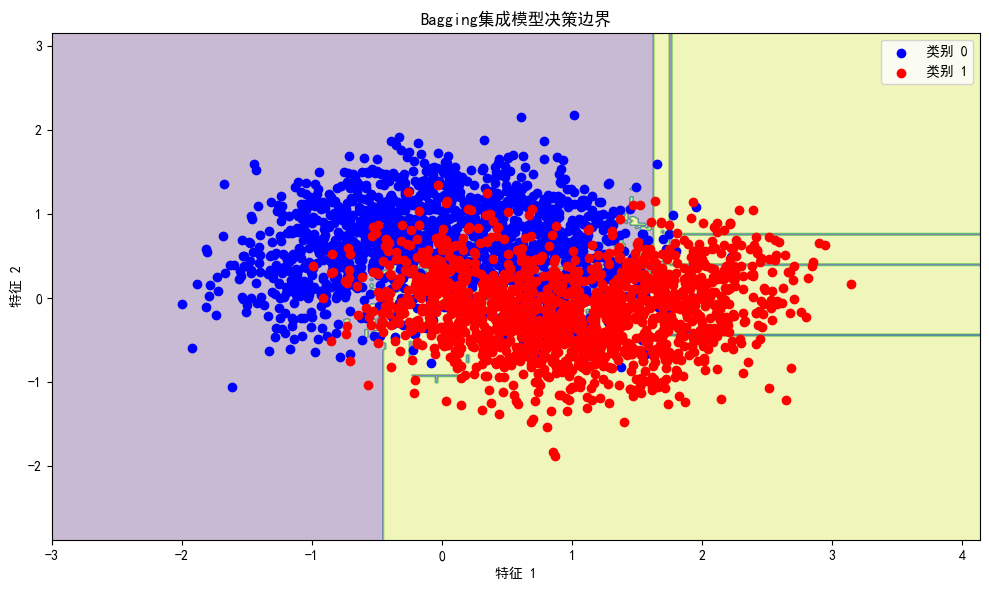


不同集成方法比较:
软投票集成准确率: 0.8503
硬投票集成准确率: 0.8477
Bagging集成准确率: 0.8240
基础模型平均准确率: 0.8436

各个基础模型的性能评估:
基础模型 1 准确率: 0.7880
基础模型 2 准确率: 0.7913
基础模型 3 准确率: 0.7930
基础模型 4 准确率: 0.8010
基础模型 5 准确率: 0.7903
基础模型 6 准确率: 0.7940
基础模型 7 准确率: 0.7847
基础模型 8 准确率: 0.7830
基础模型 9 准确率: 0.7890
基础模型 10 准确率: 0.7763

Bagging基础模型平均准确率: 0.7891
Bagging集成模型准确率: 0.8240


In [9]:
# 导入必要的库
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 创建Bagging分类器
# 使用决策树作为基础分类器，创建10个不同的决策树模型
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # 使用estimator参数而不是base_estimator
    n_estimators=10,
    max_samples=0.8,  # 每个基础模型使用80%的训练样本
    max_features=1.0,  # 不要对特征进行抽样，使用所有特征
    bootstrap=True,    # 使用有放回抽样
    bootstrap_features=False,  # 不对特征进行抽样
    random_state=42
)

# 训练Bagging分类器
bagging.fit(X_train, y_train)

# 在测试集上评估Bagging分类器
bagging_predictions = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
bagging_report = classification_report(y_test, bagging_predictions)

print("\nBagging集成学习结果:")
print(f"准确率: {bagging_accuracy:.4f}")
print("\n分类报告:")
print(bagging_report)

# 可视化Bagging模型的决策边界
plt.figure(figsize=(10, 6))
plot_decision_boundary(bagging, X_test, y_test, "Bagging集成模型决策边界")
plt.tight_layout()
plt.show()

# 比较Bagging与之前的集成方法
print("\n不同集成方法比较:")
print(f"软投票集成准确率: {accuracy:.4f}")
print(f"硬投票集成准确率: {hard_voting_accuracy:.4f}")
print(f"Bagging集成准确率: {bagging_accuracy:.4f}")
print(f"基础模型平均准确率: {np.mean([lr_accuracy, svm_accuracy, dt_accuracy]):.4f}")

# 查看Bagging中各个基础模型的性能
print("\n各个基础模型的性能评估:")
base_estimator_scores = []
# 使用整个测试集评估每个基础模型
for i, estimator in enumerate(bagging.estimators_):
    # 确保使用整个特征集评估模型
    score = estimator.score(X_test, y_test)
    base_estimator_scores.append(score)
    print(f"基础模型 {i+1} 准确率: {score:.4f}")

print(f"\nBagging基础模型平均准确率: {np.mean(base_estimator_scores):.4f}")
print(f"Bagging集成模型准确率: {bagging_accuracy:.4f}")



### 无放回抽样Bagging实验 ###

无放回抽样Bagging集成学习结果:
准确率: 0.8507

分类报告:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1532
           1       0.84      0.86      0.85      1468

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



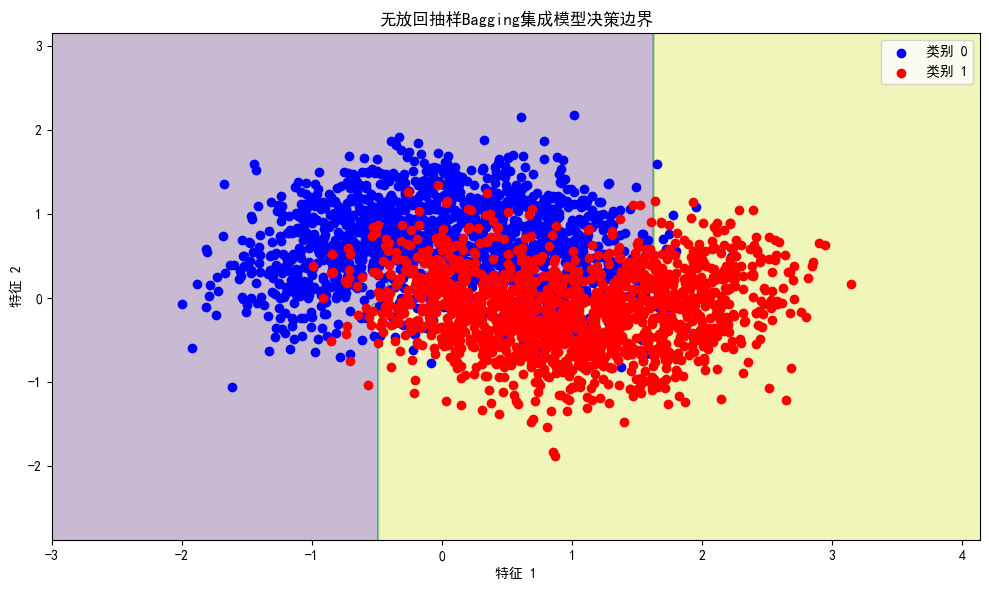


有放回vs无放回抽样Bagging比较:
有放回抽样Bagging准确率: 0.8240
无放回抽样Bagging准确率: 0.8507

无放回抽样Bagging各个基础模型的性能评估:
基础模型 1 准确率: 0.8483
基础模型 2 准确率: 0.8397
基础模型 3 准确率: 0.8467
基础模型 4 准确率: 0.8433
基础模型 5 准确率: 0.8477

无放回抽样Bagging基础模型平均准确率: 0.8455
无放回抽样Bagging集成模型准确率: 0.8507


In [10]:
# 创建无放回抽样的Bagging分类器
print("\n### 无放回抽样Bagging实验 ###")
bagging_without_replacement = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,  # 使用50个基础模型
    max_samples=0.7,  # 每个基础模型使用70%的训练样本
    max_features=1.0,  # 使用所有特征
    bootstrap=False,  # 使用无放回抽样
    bootstrap_features=False,  # 不对特征进行抽样
    random_state=42
)

# 训练无放回抽样的Bagging分类器
bagging_without_replacement.fit(X_train, y_train)

# 在测试集上评估无放回抽样的Bagging分类器
wo_replacement_predictions = bagging_without_replacement.predict(X_test)
wo_replacement_accuracy = accuracy_score(y_test, wo_replacement_predictions)
wo_replacement_report = classification_report(y_test, wo_replacement_predictions)

print("\n无放回抽样Bagging集成学习结果:")
print(f"准确率: {wo_replacement_accuracy:.4f}")
print("\n分类报告:")
print(wo_replacement_report)

# 可视化无放回抽样Bagging模型的决策边界
plt.figure(figsize=(10, 6))
plot_decision_boundary(bagging_without_replacement, X_test, y_test, "无放回抽样Bagging集成模型决策边界")
plt.tight_layout()
plt.show()

# 比较有放回和无放回抽样的Bagging
print("\n有放回vs无放回抽样Bagging比较:")
print(f"有放回抽样Bagging准确率: {bagging_accuracy:.4f}")
print(f"无放回抽样Bagging准确率: {wo_replacement_accuracy:.4f}")

# 查看无放回抽样Bagging中各个基础模型的性能
print("\n无放回抽样Bagging各个基础模型的性能评估:")
wo_replacement_base_scores = []
# 使用整个测试集评估每个基础模型
for i, estimator in enumerate(bagging_without_replacement.estimators_):
    score = estimator.score(X_test, y_test)
    wo_replacement_base_scores.append(score)
    if i < 5:  # 只打印前5个基础模型的性能，避免输出过多
        print(f"基础模型 {i+1} 准确率: {score:.4f}")

print(f"\n无放回抽样Bagging基础模型平均准确率: {np.mean(wo_replacement_base_scores):.4f}")
print(f"无放回抽样Bagging集成模型准确率: {wo_replacement_accuracy:.4f}")


# njobs

In [11]:
# 多线程并行训练Bagging分类器
import time
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

print("n_jobs参数演示 - 多线程并行训练Bagging分类器")
print("="*50)

# 创建一个基础决策树分类器
base_estimator = DecisionTreeClassifier(max_depth=5)

# 使用不同的n_jobs参数值创建Bagging分类器
n_jobs_values = [1, 2, 4, -1]  # -1表示使用所有可用的CPU核心

results = {}

for n_jobs in n_jobs_values:
    # 创建Bagging分类器
    bagging_classifier = BaggingClassifier(
        estimator=base_estimator, 
        n_estimators=100,  # 使用100个基分类器
        bootstrap=True,
        n_jobs=n_jobs,     # 设置并行度
        random_state=42
    )
    
    # 记录训练开始时间
    start_time = time.time()
    
    # 训练模型
    bagging_classifier.fit(X_train, y_train)
    
    # 计算训练时间
    training_time = time.time() - start_time
    
    # 在测试集上评估
    accuracy = accuracy_score(y_test, bagging_classifier.predict(X_test))
    
    # 保存结果
    results[n_jobs] = {
        'accuracy': accuracy,
        'training_time': training_time
    }
    
    # 打印结果
    if n_jobs == -1:
        n_jobs_display = "全部CPU核心"
    else:
        n_jobs_display = f"{n_jobs}个CPU核心"
        
    print(f"n_jobs={n_jobs} ({n_jobs_display}):")
    print(f"  训练时间: {training_time:.4f} 秒")
    print(f"  准确率: {accuracy:.4f}")
    print("-"*40)


print("\nn_jobs参数说明:")
print("1. n_jobs=1: 使用单线程训练所有基分类器")
print("2. n_jobs=N: 使用N个并行线程训练基分类器")
print("3. n_jobs=-1: 使用所有可用的CPU核心进行并行训练")
print("\n注意事项:")
print("- 增加n_jobs可以加速训练，但不会改变模型的准确率")
print("- 并行计算会占用更多内存")
print("- 对于小数据集，并行开销可能超过加速收益")



n_jobs参数演示 - 多线程并行训练Bagging分类器
n_jobs=1 (1个CPU核心):
  训练时间: 0.4944 秒
  准确率: 0.8507
----------------------------------------
n_jobs=2 (2个CPU核心):
  训练时间: 1.2247 秒
  准确率: 0.8507
----------------------------------------
n_jobs=4 (4个CPU核心):
  训练时间: 1.2496 秒
  准确率: 0.8507
----------------------------------------
n_jobs=-1 (全部CPU核心):
  训练时间: 1.7923 秒
  准确率: 0.8507
----------------------------------------

n_jobs参数说明:
1. n_jobs=1: 使用单线程训练所有基分类器
2. n_jobs=N: 使用N个并行线程训练基分类器
3. n_jobs=-1: 使用所有可用的CPU核心进行并行训练

注意事项:
- 增加n_jobs可以加速训练，但不会改变模型的准确率
- 并行计算会占用更多内存
- 对于小数据集，并行开销可能超过加速收益


# 加入bootstrap_features

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# 生成示例数据
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 保存结果
results = {}

plt.figure(figsize=(15, 8))

# 创建Bagging分类器
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap=True,  # 采样样本
    bootstrap_features=True,  # 采样特征
    random_state=42,
    n_jobs=-1
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
bagging.fit(X_train, y_train)

# 计算训练时间
training_time = time.time() - start_time

# 评估准确率
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 保存结果
key = "bootstrap_features=True"
results[key] = {
    'accuracy': accuracy,
    'training_time': training_time
}

# 打印结果
print(f"bootstrap_features=True:")
print(f"  训练时间: {training_time:.4f} 秒")
print(f"  准确率: {accuracy:.4f}")
print("-"*40)

print("\nbootstrap_features参数说明:")
print("1. bootstrap_features=True: 对特征进行随机采样（有放回）")
print("2. bootstrap_features=False: 使用所有特征，不进行特征采样")
print("\n结论:")
print("- 特征采样可以增加基分类器的多样性")
print("- 适当的特征采样可以提高整体模型的泛化能力")
print("- 特征采样有助于减少过拟合风险")


bootstrap_features=True:
  训练时间: 0.0657 秒
  准确率: 0.8950
----------------------------------------

bootstrap_features参数说明:
1. bootstrap_features=True: 对特征进行随机采样（有放回）
2. bootstrap_features=False: 使用所有特征，不进行特征采样

结论:
- 特征采样可以增加基分类器的多样性
- 适当的特征采样可以提高整体模型的泛化能力
- 特征采样有助于减少过拟合风险


<Figure size 1500x800 with 0 Axes>

# ExtraTreesClassifier

ExtraTreesClassifier (极端随机树) 示例
训练时间: 0.0612 秒
准确率: 0.9350


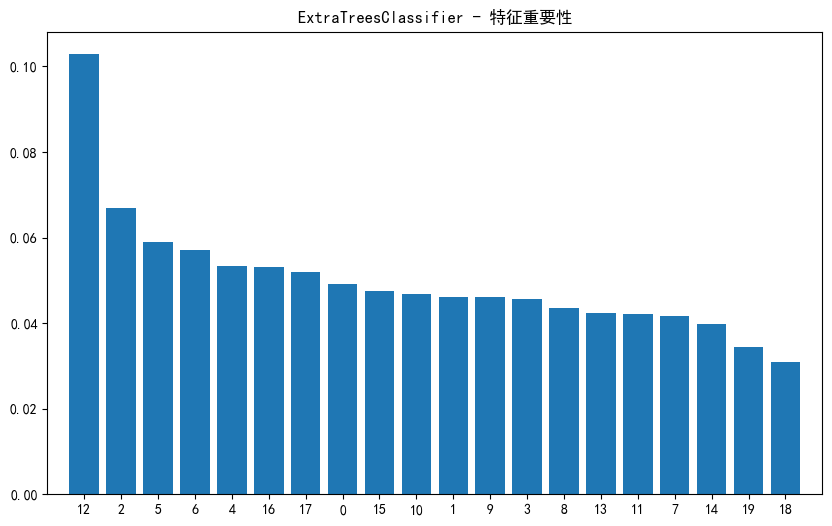


ExtraTreesClassifier与RandomForestClassifier的比较:
1. 节点分裂方式:
   - RandomForest: 寻找最佳分裂特征和分裂点
   - ExtraTrees: 随机选择特征和分裂点，计算开销更小

2. 随机性:
   - ExtraTrees引入了更多的随机性，有助于减少方差
   - 训练速度通常比RandomForest更快

3. 应用场景:
   - 当数据集噪声较大时，ExtraTrees的随机性可能更有优势
   - 对计算资源敏感的场景可以考虑使用ExtraTrees


In [13]:
# 导入ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
import time

print("="*50)
print("ExtraTreesClassifier (极端随机树) 示例")
print("="*50)

# 创建并训练ExtraTreesClassifier模型
extra_trees = ExtraTreesClassifier(
    n_estimators=100,  # 树的数量
    max_features='sqrt',  # 每个节点考虑的特征数量
    max_depth=None,  # 树的最大深度，None表示无限制
    min_samples_split=2,  # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,  # 叶节点所需的最小样本数
    min_weight_fraction_leaf=0.0,  # 叶节点所需的最小权重分数
    criterion='gini',  # 分裂质量的衡量标准，可选'gini'或'entropy'
    bootstrap=False,  # 是否对样本进行bootstrap采样
    oob_score=False,  # 是否使用袋外样本估计泛化得分
    class_weight=None,  # 类别权重
    ccp_alpha=0.0,  # 用于最小成本复杂性剪枝的复杂度参数
    random_state=42,
    n_jobs=-1
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
extra_trees.fit(X_train, y_train)

# 计算训练时间
training_time = time.time() - start_time

# 评估准确率
y_pred = extra_trees.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"训练时间: {training_time:.4f} 秒")
print(f"准确率: {accuracy:.4f}")

# 可视化特征重要性
feature_importances = extra_trees.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("ExtraTreesClassifier - 特征重要性")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

print("\nExtraTreesClassifier与RandomForestClassifier的比较:")
print("1. 节点分裂方式:")
print("   - RandomForest: 寻找最佳分裂特征和分裂点")
print("   - ExtraTrees: 随机选择特征和分裂点，计算开销更小")
print("\n2. 随机性:")
print("   - ExtraTrees引入了更多的随机性，有助于减少方差")
print("   - 训练速度通常比RandomForest更快")
print("\n3. 应用场景:")
print("   - 当数据集噪声较大时，ExtraTrees的随机性可能更有优势")
print("   - 对计算资源敏感的场景可以考虑使用ExtraTrees")


# adaBoosting

In [15]:
# 导入AdaBoost相关库
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import time

# 创建AdaBoost分类器
# 使用决策树桩(深度为1的决策树)作为基本分类器
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,  # 弱分类器数量
    learning_rate=1.0,  # 学习率
    algorithm='SAMME',  # 使用SAMME算法，因为当前版本不支持SAMME.R
    random_state=42
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
ada_boost.fit(X_train, y_train)

# 计算训练时间
training_time = time.time() - start_time

# 评估准确率
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost训练时间: {training_time:.4f} 秒")
print(f"AdaBoost准确率: {accuracy:.4f}")


print("\nAdaBoost算法原理:")
print("1. 初始化: 为每个训练样本赋予相同的权重")
print("2. 迭代训练:")
print("   - 使用当前样本权重训练一个弱分类器")
print("   - 计算弱分类器的错误率")
print("   - 计算弱分类器的权重(错误率越低，权重越大)")
print("   - 更新样本权重(分类错误的样本权重增加)")
print("3. 最终模型: 所有弱分类器的加权组合")
print("\nAdaBoost优势:")
print("1. 专注于难以分类的样本，提高整体性能")
print("2. 自动选择最重要的特征")
print("3. 相对简单且易于实现")
print("\nAdaBoost局限性:")
print("1. 对异常值敏感")
print("2. 依赖于弱分类器的选择")
print("3. 串行训练过程，难以并行化")


AdaBoost训练时间: 0.1031 秒
AdaBoost准确率: 0.8200

AdaBoost算法原理:
1. 初始化: 为每个训练样本赋予相同的权重
2. 迭代训练:
   - 使用当前样本权重训练一个弱分类器
   - 计算弱分类器的错误率
   - 计算弱分类器的权重(错误率越低，权重越大)
   - 更新样本权重(分类错误的样本权重增加)
3. 最终模型: 所有弱分类器的加权组合

AdaBoost优势:
1. 专注于难以分类的样本，提高整体性能
2. 自动选择最重要的特征
3. 相对简单且易于实现

AdaBoost局限性:
1. 对异常值敏感
2. 依赖于弱分类器的选择
3. 串行训练过程，难以并行化


d:\Soft\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


# GBDT

GBDT集成准确率: 0.91


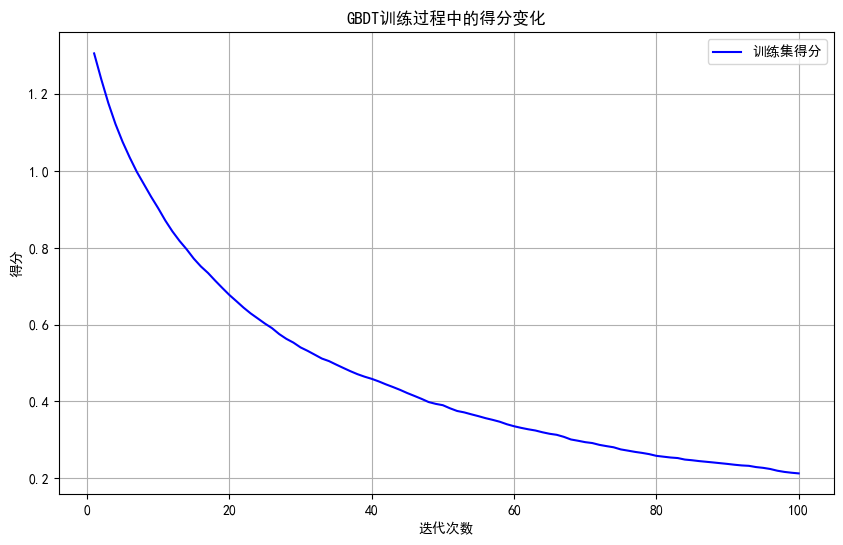


GBDT算法原理:
1. 初始化: 建立初始预测模型（通常是一个简单的常数值）
2. 迭代训练:
   - 计算当前模型的残差（实际值与预测值之差）
   - 训练一个新的决策树来拟合这些残差
   - 将新树乘以学习率后添加到现有模型中
3. 最终模型: 所有树的加权和

GBDT优势:
1. 强大的预测能力，通常比随机森林表现更好
2. 可以处理各种类型的数据和损失函数
3. 能够自动处理特征交互
4. 对特征缩放不敏感

GBDT局限性:
1. 容易过拟合，需要仔细调参
2. 训练时间较长，因为树是顺序构建的
3. 对异常值较为敏感
4. 解释性不如单棵决策树直观


In [18]:
# 导入梯度提升决策树分类器
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

# 创建GBDT分类器
gbdt_clf = GradientBoostingClassifier(
    n_estimators=100,           # 弱分类器的数量
    learning_rate=0.1,          # 学习率
    max_depth=3,                # 决策树的最大深度
    min_samples_split=2,        # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,         # 叶节点所需的最小样本数
    subsample=1.0,              # 用于拟合各个基础学习器的样本比例
    random_state=42             # 随机种子，确保结果可复现
)

# 训练GBDT分类器
gbdt_clf.fit(X_train, y_train)

# 预测
gbdt_pred = gbdt_clf.predict(X_test)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)

print("GBDT集成准确率:", gbdt_accuracy)

# 绘制GBDT的训练过程中的损失函数变化
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gbdt_clf.train_score_) + 1), gbdt_clf.train_score_, 'b-', label='训练集得分')
plt.xlabel('迭代次数')
plt.ylabel('得分')
plt.title('GBDT训练过程中的得分变化')
plt.legend()
plt.grid(True)
plt.show()

print("\nGBDT算法原理:")
print("1. 初始化: 建立初始预测模型（通常是一个简单的常数值）")
print("2. 迭代训练:")
print("   - 计算当前模型的残差（实际值与预测值之差）")
print("   - 训练一个新的决策树来拟合这些残差")
print("   - 将新树乘以学习率后添加到现有模型中")
print("3. 最终模型: 所有树的加权和")
print("\nGBDT优势:")
print("1. 强大的预测能力，通常比随机森林表现更好")
print("2. 可以处理各种类型的数据和损失函数")
print("3. 能够自动处理特征交互")
print("4. 对特征缩放不敏感")
print("\nGBDT局限性:")
print("1. 容易过拟合，需要仔细调参")
print("2. 训练时间较长，因为树是顺序构建的")
print("3. 对异常值较为敏感")
print("4. 解释性不如单棵决策树直观")